In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb
import lightgbm as lgb

from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv('Cleaned_Dry_Eye_Dataset.csv')
# 添加 BMI（体重(kg) / 身高(m)^2）
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# 添加 HighBP（高血压指标：收缩压>130 或 舒张压>85）
df['HighBP'] = ((df['Systolic BP'] > 130) | (df['Diastolic BP'] > 85)).astype(int)


In [3]:
target_column = 'Dry Eye Disease'
X = df.drop(columns=[target_column])
y = df[target_column]

X

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,...,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Systolic BP,Diastolic BP,Gender_M,BMI,HighBP
0,24,9.5,2,1,67,3000,31,161,69,1,...,8.7,0,1,1,0,137,89,False,26.619343,1
1,39,9.6,2,3,60,12000,74,164,87,0,...,9.6,1,0,0,1,108,64,True,32.346817,0
2,45,5.4,1,5,95,12000,93,179,94,1,...,4.0,0,1,0,0,134,81,False,29.337411,1
3,45,5.4,4,5,78,19000,32,160,77,0,...,7.6,0,1,0,1,110,90,False,30.078125,1
4,42,5.7,3,2,72,4000,173,179,99,0,...,3.5,0,1,1,0,99,67,False,30.897912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,26,9.4,2,3,91,20000,88,200,72,0,...,3.8,0,1,0,1,132,64,True,18.000000,1
19996,39,7.3,3,4,65,2000,53,195,96,1,...,3.8,0,0,1,0,101,75,False,25.246548,0
19997,20,8.0,5,3,78,10000,17,186,87,0,...,8.4,0,0,1,0,124,63,False,25.147416,0
19998,38,4.5,3,3,60,3000,115,170,66,0,...,2.2,0,0,0,1,136,70,True,22.837370,1


### Train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
def test_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# XGBoost Default Model

In [6]:
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [7]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6615
Recall: 0.8569236670502494
F1 Score: 0.7674338715218139
ROC AUC: 0.584216358244728

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.30      0.38      1393
           1       0.69      0.86      0.77      2607

    accuracy                           0.66      4000
   macro avg       0.61      0.58      0.57      4000
weighted avg       0.64      0.66      0.63      4000



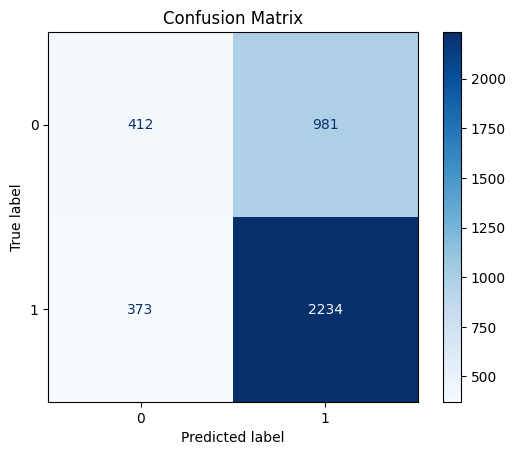

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


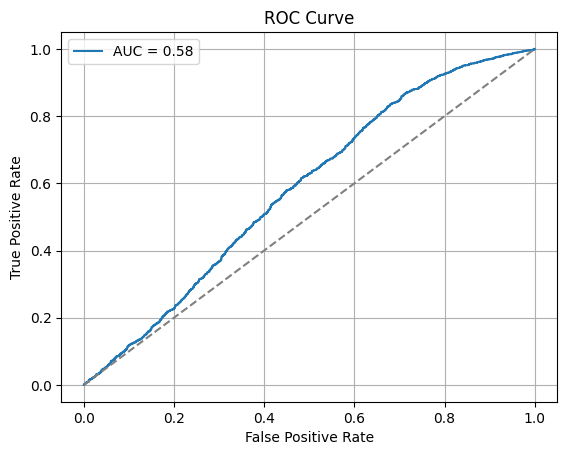

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


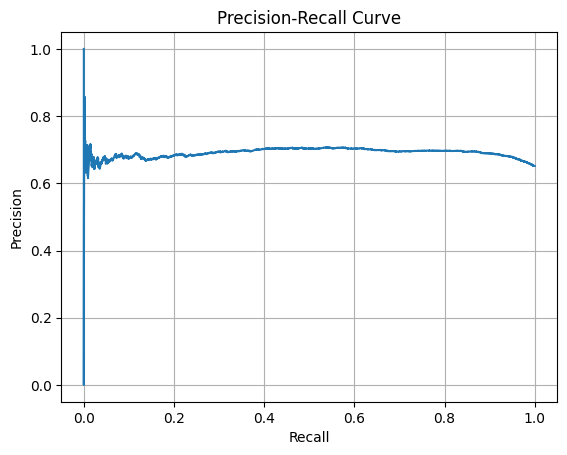

In [10]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


# LightGBM default model

In [27]:
def print_metrics(y_test, y_pred_lgb, y_pred_lgb_prob):
    print("Accuracy:", round(accuracy_score(y_test, y_pred_lgb),4))
    print("Recall:", round(recall_score(y_test, y_pred_lgb),4))
    print("F1 Score:", round(f1_score(y_test, y_pred_lgb),4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_pred_lgb_prob),4))
    #print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

In [28]:
model_lgb = LGBMClassifier(
    random_state=42,
    num_leaves=64,
    min_child_samples=40,
    max_depth=64,
    learning_rate=0.05
)


model_lgb.fit(X_train, y_train)


y_pred_lgb = model_lgb.predict(X_test)
y_pred_lgb_prob = model_lgb.predict_proba(X_test)[:, 1]


print_metrics(y_test, y_pred_lgb, y_pred_lgb_prob)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10430, number of negative: 5570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.651875 -> initscore=0.627291
[LightGBM] [Info] Start training from score 0.627291
Accuracy: 0.7
Recall: 0.9379
F1 Score: 0.803
ROC AUC: 0.5932


### Confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# 计算 confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

# 用 pandas 打印带有标签的表格
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("Confusion Matrix:")
print(cm_df)


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          355         1038
Actual 1          162         2445


### Plot feature importance

<Figure size 1000x800 with 0 Axes>

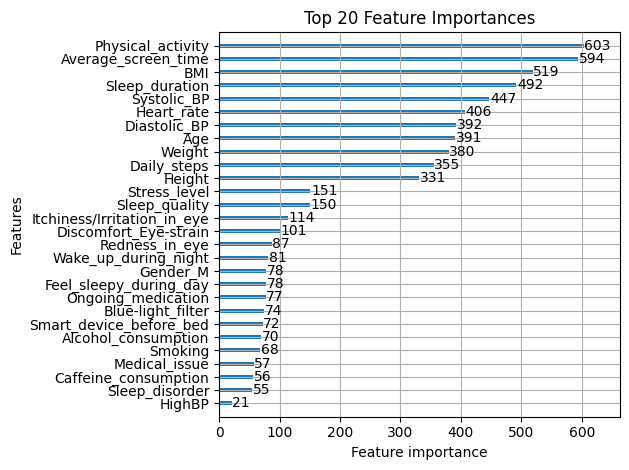

In [21]:
from lightgbm import LGBMClassifier, plot_importance
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
ax = plot_importance(
    model_lgb, 
    importance_type='split',  # 或 'gain'
    height=0.3,               # 每个bar之间的间距（默认是0.2）
    ax=None
)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

### Automated way to drop unimportant features

In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# model_lgb is trained based on full columns
importance_df = pd.DataFrame({
    'feature': model_lgb.feature_name_,
    'importance': model_lgb.feature_importances_
}).sort_values(by='importance', ascending=True)


accuracy_list = []
dropped_lists = []


def drop_col(df, dropped_columns):
    return df.drop(columns=dropped_columns)


num_drop_at_most = 5
# 
for n in range(0, num_drop_at_most+1):
    # 步骤 2-3：取前 n 个最不重要的特征，替换下划线为空格
    dropped_columns = importance_df.head(n)['feature'].str.replace('_', ' ', regex=False).tolist()
    dropped_lists.append(dropped_columns)

    # 步骤 4：构造新的训练集与测试集
    X_train_new = drop_col(X_train, dropped_columns)
    X_test_new = drop_col(X_test, dropped_columns)

    # 步骤 5：训练模型
    model = LGBMClassifier(random_state=42)
    
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    
    # Calculate accuracy
    acc = round(accuracy_score(y_test, y_pred), 6)
    accuracy_list.append(acc)

# 步骤 7：筛选最高 accuracy
best_idx = accuracy_list.index(max(accuracy_list))
print(f"Highest Accuracy: {accuracy_list[best_idx]:.6f} by dropping columns: {dropped_lists[best_idx]}")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10430, number of negative: 5570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.651875 -> initscore=0.627291
[LightGBM] [Info] Start training from score 0.627291
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10430, number of negative: 5570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

##### Based on this, we drop `HighBP` and `Sleep disorder`

In [43]:
optimal_dropped_columns = ['HighBP','Sleep disorder']

X_train_selected = drop_col(X_train, dropped_columns)
X_test_selected = drop_col(X_test, dropped_columns)

### Random search hyperparameter
### Note: as there are finite iterations for random search, we only use the result as a reference

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np
import warnings
warnings.filterwarnings('ignore')

param_dist = {
    'num_leaves': np.arange(20, 151),
    'max_depth': np.arange(3, 16),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'min_child_samples': np.arange(10, 101),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}


lgb_rs = LGBMClassifier(random_state=42, verbose=-1)

# 用 AUC 作为评分标准
scorer = make_scorer(roc_auc_score, needs_proba=True)

# 随机搜索
random_search = RandomizedSearchCV(
    estimator=lgb_rs,
    param_distributions=param_dist,
    n_iter=200,  # 最多搜索 200 组参数
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=1
)


random_search.fit(X_train_selected, y_train)

# 输出最佳参数和AUC
print("Best AUC:", random_search.best_score_)
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best AUC: 0.6032478642777102
Best Params: {'num_leaves': np.int64(138), 'min_child_samples': np.int64(21), 'max_depth': np.int64(3), 'learning_rate': np.float64(0.12999999999999998), 'colsample_bytree': np.float64(0.7)}


### Final model

In [ ]:

model_lgb_final = LGBMClassifier(
    # random_state=42,
    num_leaves=36,
    min_child_samples=30,
    max_depth=3,
    learning_rate=0.02,
    colsample_bytree=0.7
)


model_lgb_final.fit(X_train_selected, y_train)


y_pred_lgb_final = model_lgb_final.predict(X_test_selected)
y_pred_lgb_prob_final = model_lgb_final.predict_proba(X_test_selected)[:, 1]


print_metrics(y_test, y_pred_lgb_final, y_pred_lgb_prob_final)


Accuracy: 0.7005
Recall: 0.9382
F1 Score: 0.8033
ROC AUC: 0.6074


### Using the whole dataset

In [89]:
X_final = drop_col(X, dropped_columns)

model_lgb_whole = LGBMClassifier(
    # random_state=42,
    num_leaves=36,
    min_child_samples=30,
    max_depth=3,
    learning_rate=0.02,
    colsample_bytree=0.7
)


model_lgb_whole.fit(X_final, y)


y_lgb_final = model_lgb_whole.predict(X_final)
y_lgb_prob_final = model_lgb_whole.predict_proba(X_final)[:, 1]


print_metrics(y, y_lgb_final, y_lgb_prob_final)


Accuracy: 0.698
Recall: 0.9382
F1 Score: 0.802
ROC AUC: 0.6272


# XGBoost imbalance

In [16]:
# handling class imbalance
from collections import Counter
import xgboost as xgb

# 1. Count the distribution in training set
counter = Counter(y_train)
print("Class distribution:", counter)

# 2. Compute scale_pos_weight = #negative / #positive
# Assuming '1' is the positive class (Dry Eye Disease present)
scale_pos_weight = counter[0] / counter[1]
print("scale_pos_weight:", scale_pos_weight)


Class distribution: Counter({1: 10430, 0: 5570})
scale_pos_weight: 0.5340364333652924


In [24]:
model_scale_pos_weight = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

test_performance(model_scale_pos_weight, X_train, y_train, X_test, y_test)

Accuracy: 0.606
Recall: 0.7046413502109705
F1 Score: 0.6998095238095238
ROC AUC: 0.5797275048594939

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.42      0.43      1393
           1       0.70      0.70      0.70      2607

    accuracy                           0.61      4000
   macro avg       0.56      0.56      0.56      4000
weighted avg       0.60      0.61      0.60      4000



# Random Undersampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_under_sampled, y_train_under_sampled = undersampler.fit_resample(X_train, y_train)

print("Class distribution after undersampling:")
print(pd.Series(y_train_under_sampled).value_counts())

Class distribution after undersampling:
Dry Eye Disease
0    5570
1    5570
Name: count, dtype: int64


/Users/schumewang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/schumewang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [23]:
model_undersampled = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
test_performance(model_undersampled, X_train_under_sampled, y_train_under_sampled, X_test, y_test)


Accuracy: 0.562
Recall: 0.5788262370540852
F1 Score: 0.6327044025157232
ROC AUC: 0.5732010923156524

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.53      0.46      1393
           1       0.70      0.58      0.63      2607

    accuracy                           0.56      4000
   macro avg       0.55      0.55      0.55      4000
weighted avg       0.59      0.56      0.57      4000



# Random Oversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_over_sampled, y_train_over_sampled = oversampler.fit_resample(X_train, y_train)

print("Class distribution after oversampling:")
print(pd.Series(y_train_over_sampled).value_counts())

Class distribution after oversampling:
Dry Eye Disease
0    10430
1    10430
Name: count, dtype: int64


/Users/schumewang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/schumewang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [25]:
model_oversampled = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
test_performance(model_oversampled, X_train_over_sampled, y_train_over_sampled, X_test, y_test)


Accuracy: 0.613
Recall: 0.7337936325278097
F1 Score: 0.7119464086341645
ROC AUC: 0.5748389599925761

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.39      0.41      1393
           1       0.69      0.73      0.71      2607

    accuracy                           0.61      4000
   macro avg       0.56      0.56      0.56      4000
weighted avg       0.60      0.61      0.61      4000



# Smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote_sampled, y_train_smote_sampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote_sampled).value_counts())

Class distribution after SMOTE:
Dry Eye Disease
0    10430
1    10430
Name: count, dtype: int64


/Users/schumewang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [26]:
model_smote = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
test_performance(model_smote, X_train_smote_sampled, y_train_smote_sampled, X_test, y_test)


Accuracy: 0.63675
Recall: 0.7813578826237054
F1 Score: 0.7371087389180387
ROC AUC: 0.595271276652868

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.37      0.41      1393
           1       0.70      0.78      0.74      2607

    accuracy                           0.64      4000
   macro avg       0.58      0.57      0.57      4000
weighted avg       0.62      0.64      0.62      4000



# Finetune

In [32]:
model_finetuned = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight,           
    learning_rate=0.01,                  
    n_estimators=200,                     
    max_depth=3,                          
    subsample=0.8, colsample_bytree=0.8   
)
test_performance(model_finetuned, X_train, y_train, X_test, y_test)

Accuracy: 0.69325
Recall: 0.9217491369390104
F1 Score: 0.7966185977125808
ROC AUC: 0.6078926056662841

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.27      0.38      1393
           1       0.70      0.92      0.80      2607

    accuracy                           0.69      4000
   macro avg       0.67      0.59      0.59      4000
weighted avg       0.68      0.69      0.65      4000



In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight]
}

model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1', 
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 0.5340364333652924, 'subsample': 0.6}
Best Score: 0.8013644582461724


In [35]:
model_best_grid_search = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight,           
    learning_rate=0.01,                  
    n_estimators=100,                     
    max_depth=3,                          
    subsample=0.6, colsample_bytree=1.0  
)
test_performance(model_best_grid_search, X_train, y_train, X_test, y_test)

Accuracy: 0.7005
Recall: 0.9382431914077484
F1 Score: 0.8032840722495895
ROC AUC: 0.6075609292007741

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.26      0.37      1393
           1       0.70      0.94      0.80      2607

    accuracy                           0.70      4000
   macro avg       0.70      0.60      0.59      4000
weighted avg       0.70      0.70      0.65      4000

